In [ ]:
import torch
from torch import nn
torch.__version__

'2.2.1+cu121'

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

#1.Data

In [ ]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_chicken_wings_fried_rice"

if image_path.is_dir():
  print(f'{image_path} directory already exists... skipping download')
else:
  print(f'{image_path} does not exist, creating one...')
  image_path.mkdir(parents=True, exist_ok=True)

with open(data_path/"pizza_chicken_wings_fried_rice.zip", "wb") as f:
  request = requests.get('https://github.com/Hrut7hesh/git_test/raw/main/pizza_chicken_wings_fried_rice_10_percent.zip')
  print("Downloading data...")
  f.write(request.content)

with zipfile.ZipFile(data_path/"pizza_chicken_wings_fried_rice.zip", "r") as zip_ref:
  print("Unzipping data...")
  zip_ref.extractall(image_path)

data/pizza_chicken_wings_fried_rice directory already exists... skipping download
Unzipping data...


In [ ]:
import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in "{dirpath}".')
walk_through_dir(image_path)

There are 2 directories and 0 images in "data/pizza_chicken_wings_fried_rice".
There are 3 directories and 0 images in "data/pizza_chicken_wings_fried_rice/test".
There are 0 directories and 31 images in "data/pizza_chicken_wings_fried_rice/test/pizza".
There are 0 directories and 19 images in "data/pizza_chicken_wings_fried_rice/test/fried_rice".
There are 0 directories and 25 images in "data/pizza_chicken_wings_fried_rice/test/chicken_wings".
There are 3 directories and 0 images in "data/pizza_chicken_wings_fried_rice/train".
There are 0 directories and 72 images in "data/pizza_chicken_wings_fried_rice/train/pizza".
There are 0 directories and 75 images in "data/pizza_chicken_wings_fried_rice/train/fried_rice".
There are 0 directories and 78 images in "data/pizza_chicken_wings_fried_rice/train/chicken_wings".


In [ ]:
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir, test_dir

(PosixPath('data/pizza_chicken_wings_fried_rice/train'),
 PosixPath('data/pizza_chicken_wings_fried_rice/test'))

Random image path: data/pizza_chicken_wings_fried_rice/test/chicken_wings/3902858.jpg
Image class: chicken_wings
Image height: 512
Image width: 512


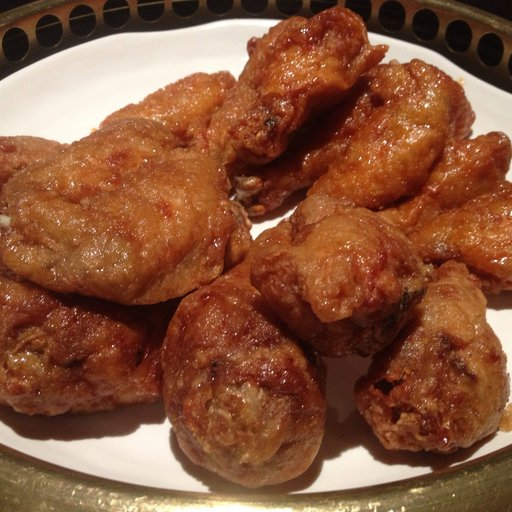

In [ ]:
import random
from PIL import Image
random.seed(42)
image_path_list = list(image_path.glob("*/*/*.jpg"))
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem
img = Image.open(random_image_path)
print(f'Random image path: {random_image_path}')
print(f'Image class: {image_class}')
print(f'Image height: {img.height}')
print(f'Image width: {img.width}')
img

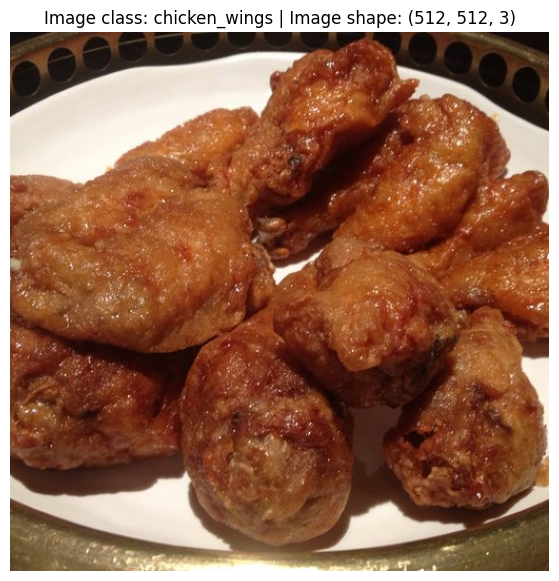

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f'Image class: {image_class} | Image shape: {img_as_array.shape}')
plt.axis(False);

array([[[23, 13, 12],
        [23, 13, 12],
        [22, 14, 12],
        ...,
        [19, 11,  8],
        [20, 12,  9],
        [20, 12,  9]],

       [[24, 14, 13],
        [23, 15, 13],
        [22, 14, 12],
        ...,
        [19, 11,  8],
        [20, 12,  9],
        [20, 12,  9]],

       [[24, 15, 16],
        [23, 14, 15],
        [23, 14, 15],
        ...,
        [19, 11,  8],
        [20, 12,  9],
        [20, 12,  9]],

       ...,

       [[92, 70, 33],
        [94, 72, 35],
        [95, 72, 38],
        ...,
        [80, 59, 32],
        [73, 52, 25],
        [71, 50, 23]],

       [[90, 68, 29],
        [92, 70, 31],
        [96, 74, 37],
        ...,
        [79, 58, 31],
        [68, 47, 20],
        [72, 51, 24]],

       [[89, 67, 28],
        [92, 70, 31],
        [97, 75, 38],
        ...,
        [80, 59, 32],
        [64, 43, 16],
        [68, 47, 20]]], dtype=uint8)
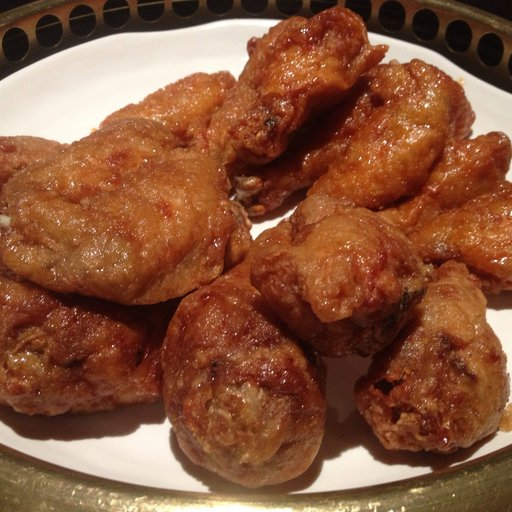

In [ ]:
img_as_array

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
data_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [ ]:
data_transform(img)

tensor([[[0.0902, 0.0863, 0.0863,  ..., 0.0745, 0.0745, 0.0784],
         [0.0863, 0.0824, 0.0863,  ..., 0.0745, 0.0745, 0.0745],
         [0.0784, 0.0784, 0.0824,  ..., 0.0706, 0.0706, 0.0745],
         ...,
         [0.3647, 0.3686, 0.3882,  ..., 0.2706, 0.2863, 0.3137],
         [0.3725, 0.3804, 0.4157,  ..., 0.2863, 0.3020, 0.2980],
         [0.3608, 0.3882, 0.4078,  ..., 0.2902, 0.3176, 0.2784]],

        [[0.0549, 0.0549, 0.0588,  ..., 0.0431, 0.0431, 0.0471],
         [0.0588, 0.0588, 0.0627,  ..., 0.0431, 0.0431, 0.0431],
         [0.0627, 0.0588, 0.0627,  ..., 0.0392, 0.0392, 0.0431],
         ...,
         [0.2745, 0.2784, 0.2980,  ..., 0.1843, 0.2039, 0.2314],
         [0.2824, 0.2902, 0.3255,  ..., 0.2000, 0.2196, 0.2157],
         [0.2745, 0.3020, 0.3176,  ..., 0.2039, 0.2353, 0.1961]],

        [[0.0510, 0.0510, 0.0549,  ..., 0.0353, 0.0314, 0.0353],
         [0.0667, 0.0627, 0.0627,  ..., 0.0353, 0.0314, 0.0314],
         [0.0745, 0.0706, 0.0667,  ..., 0.0314, 0.0275, 0.

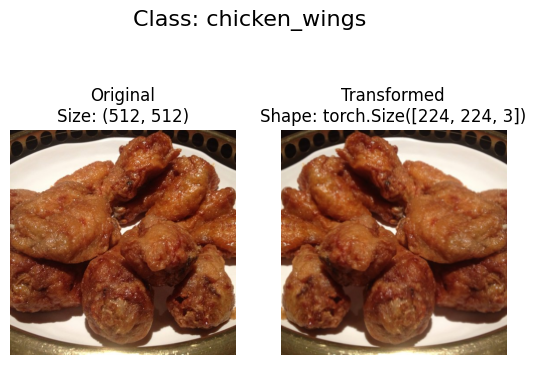

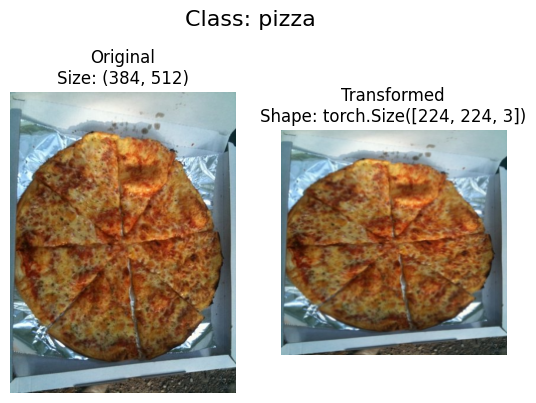

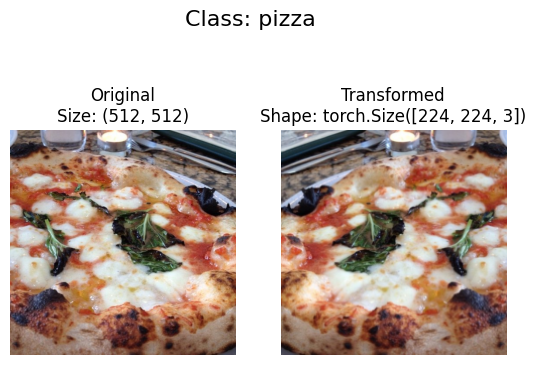

In [ ]:
def plot_transformed_images(image_paths, transform, n=3, seed=None):
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f'Original\nSize: {f.size}')
      ax[0].axis(False)
      transformed_image = transform(f).permute(1, 2, 0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f'Transformed\nShape: {transformed_image.shape}')
      ax[1].axis("off")

      fig.suptitle(f'Class: {image_path.parent.stem}', fontsize=16)
plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42)

In [ ]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_chicken_wings_fried_rice/train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_chicken_wings_fried_rice/test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
class_names = train_data.classes
class_names

['chicken_wings', 'fried_rice', 'pizza']

In [ ]:
class_dict = train_data.class_to_idx
class_dict

{'chicken_wings': 0, 'fried_rice': 1, 'pizza': 2}

In [ ]:
len(train_data), len(test_data)

(225, 75)

In [ ]:
train_data.samples[0]

('data/pizza_chicken_wings_fried_rice/train/chicken_wings/1009927.jpg', 0)

In [ ]:
img, label = train_data[0][0], train_data[0][1]
print(f'Image tensor:\n {img}')
print(f'Image shape: {img.shape}')
print(f'Image datatype: {img.dtype}')
print(f'Image label: {label}')
print(f'Label datatype: {type(label)}')

Image tensor:
 tensor([[[0.6275, 0.6314, 0.6353,  ..., 0.6118, 0.6118, 0.6118],
         [0.5765, 0.5804, 0.5804,  ..., 0.4745, 0.4745, 0.4745],
         [0.5059, 0.5098, 0.5059,  ..., 0.2824, 0.2824, 0.2824],
         ...,
         [0.0000, 0.0000, 0.0039,  ..., 0.0471, 0.2824, 0.2627],
         [0.0000, 0.0000, 0.0039,  ..., 0.0471, 0.2784, 0.2706],
         [0.0000, 0.0000, 0.0039,  ..., 0.0471, 0.2745, 0.2745]],

        [[0.6118, 0.6157, 0.6196,  ..., 0.6118, 0.6118, 0.6118],
         [0.5608, 0.5647, 0.5647,  ..., 0.4745, 0.4745, 0.4745],
         [0.4902, 0.4941, 0.4902,  ..., 0.2824, 0.2824, 0.2824],
         ...,
         [0.0000, 0.0000, 0.0039,  ..., 0.0431, 0.2784, 0.2588],
         [0.0000, 0.0000, 0.0039,  ..., 0.0431, 0.2745, 0.2667],
         [0.0000, 0.0000, 0.0039,  ..., 0.0431, 0.2706, 0.2706]],

        [[0.6078, 0.6118, 0.6157,  ..., 0.6118, 0.6118, 0.6118],
         [0.5529, 0.5569, 0.5569,  ..., 0.4745, 0.4745, 0.4745],
         [0.4784, 0.4824, 0.4784,  ..., 0.2

Original shape: torch.Size([3, 224, 224])
Image permute: torch.Size([224, 224, 3])


Text(0.5, 1.0, 'chicken_wings')

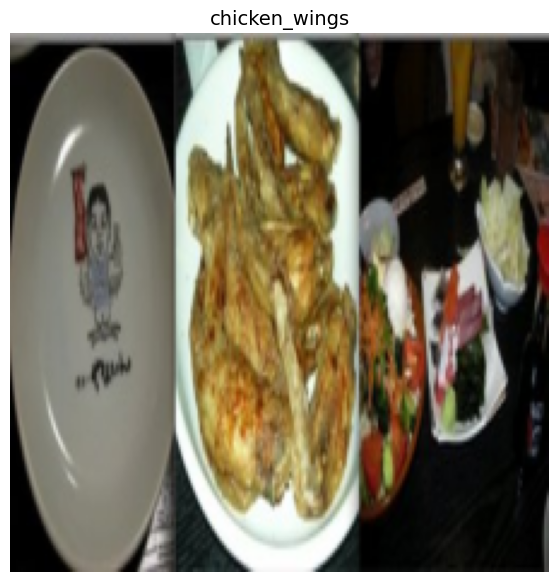

In [ ]:
img_permute = img.permute(1, 2, 0)
print(f'Original shape: {img.shape}')
print(f'Image permute: {img_permute.shape}')
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)

In [ ]:
import os
os.cpu_count()

2

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE=1
train_dataloader = DataLoader(dataset=train_data,
                                batch_size=BATCH_SIZE,
                                num_workers=1,
                                shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7c77de8d8f10>,
 <torch.utils.data.dataloader.DataLoader at 0x7c77de8d88e0>)

In [ ]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [ ]:
img, label = next(iter(train_dataloader))
print(f'Image shape: {img.shape}')
print(f'Label shape: {label.shape}')

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Image shape: torch.Size([1, 3, 224, 224])
Label shape: torch.Size([1])


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [ ]:
train_data.classes, train_data.class_to_idx

(['chicken_wings', 'fried_rice', 'pizza'],
 {'chicken_wings': 0, 'fried_rice': 1, 'pizza': 2})

In [ ]:
target_directory = train_dir
print(f'Target dir: {target_directory}')
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: data/pizza_chicken_wings_fried_rice/train


['chicken_wings', 'fried_rice', 'pizza']

In [ ]:
list(os.scandir(target_directory))

[<DirEntry 'pizza'>, <DirEntry 'fried_rice'>, <DirEntry 'chicken_wings'>]

In [ ]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}...please check file structure.")
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx

In [ ]:
find_classes(target_directory)

(['chicken_wings', 'fried_rice', 'pizza'],
 {'chicken_wings': 0, 'fried_rice': 1, 'pizza': 2})

In [ ]:
from torch.utils.data import Dataset
class ImageFolderCustom(Dataset):
  def __init__(self,
               targ_dir: str,
               transform=None):
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    self.transform = transform
    self.classes, self.class_to_idx = find_classes(targ_dir)
  def load_image(self, index: int) -> Image.Image:
    image_path = self.paths[index]
    return Image.open(image_path)
  def __len__(self) -> int:
    return len(self.paths)
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]
    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx

In [ ]:
from torchvision import transforms
train_transforms = transforms.Compose([transforms.Resize(size=(224, 224)),
                                      transforms.RandomHorizontalFlip(p=0.5),
                                      transforms.ToTensor()])
test_transforms = transforms.Compose([transforms.Resize(size=(224, 224)),
                                      transforms.ToTensor])

In [ ]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)

In [ ]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7c77d195f7c0>,
 <__main__.ImageFolderCustom at 0x7c77d195d750>)

In [ ]:
len(train_data), len(train_data_custom)

(225, 225)

In [ ]:
len(test_data), len(test_data_custom)

(75, 75)

In [ ]:
train_data_custom.classes

['chicken_wings', 'fried_rice', 'pizza']

In [ ]:
train_data_custom.class_to_idx

{'chicken_wings': 0, 'fried_rice': 1, 'pizza': 2}

In [ ]:
print(train_data_custom.classes==train_data.classes)
print(test_data_custom.classes==test_data.classes)

True
True


In [ ]:
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str]=None,
                          n: int=10,
                          display_shape: bool =True,
                          seed: int = None):
  if n>10:
    n=10
    display_shape = False
    print(f"For display, n shouldn't be larger than 10, setting to 10 and removing shape display.")
  if seed:
    random.seed(seed)
  random_samples_idx = random.sample(range(len(dataset)), k=n)
  plt.figure(figsize=(16,8))
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
    targ_image_adjust = targ_image.permute(1,2,0)
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"Class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
    plt.title(title)

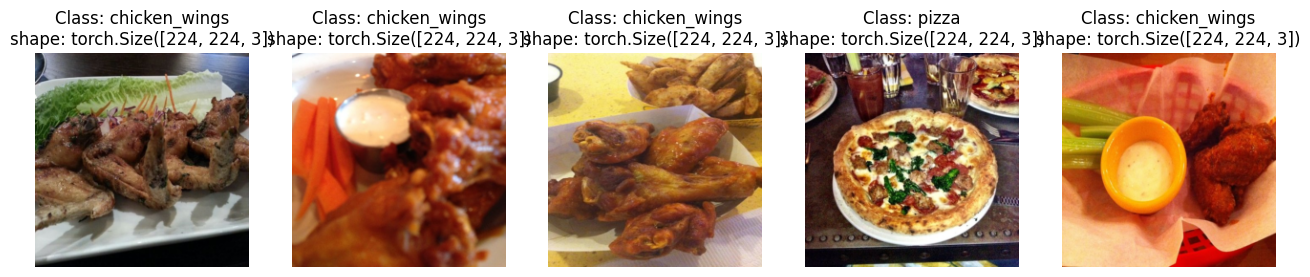

In [ ]:
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

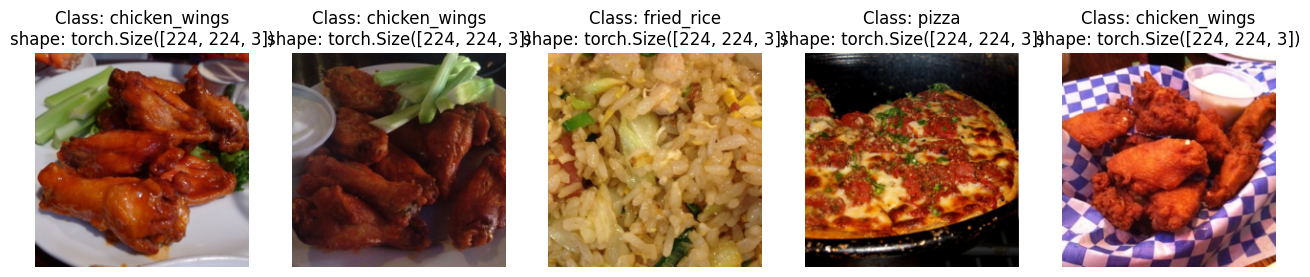

In [ ]:
display_random_images(train_data_custom,
                      n=5,
                      classes=class_names,
                      seed=None)

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 1
NUM_WORKERS = os.cpu_count()
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size = BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)
test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=False)
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7c77d1570580>,
 <torch.utils.data.dataloader.DataLoader at 0x7c77d1572440>)

In [ ]:
img_custom, label_custom = next(iter(train_dataloader_custom))
img_custom.shape, label_custom.shape

(torch.Size([1, 3, 224, 224]), torch.Size([1]))

In [ ]:
from torchvision import transforms
train_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                      transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                      transforms.ToTensor()])
test_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                     transforms.ToTensor()])

In [ ]:
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_chicken_wings_fried_rice/test/pizza/124815.jpg'),
 PosixPath('data/pizza_chicken_wings_fried_rice/test/pizza/833711.jpg'),
 PosixPath('data/pizza_chicken_wings_fried_rice/test/pizza/346091.jpg'),
 PosixPath('data/pizza_chicken_wings_fried_rice/test/pizza/3092704.jpg'),
 PosixPath('data/pizza_chicken_wings_fried_rice/test/pizza/242976.jpg'),
 PosixPath('data/pizza_chicken_wings_fried_rice/test/pizza/1202689.jpg'),
 PosixPath('data/pizza_chicken_wings_fried_rice/test/pizza/1226346.jpg'),
 PosixPath('data/pizza_chicken_wings_fried_rice/test/pizza/2161321.jpg'),
 PosixPath('data/pizza_chicken_wings_fried_rice/test/pizza/2343304.jpg'),
 PosixPath('data/pizza_chicken_wings_fried_rice/test/pizza/3898047.jpg')]

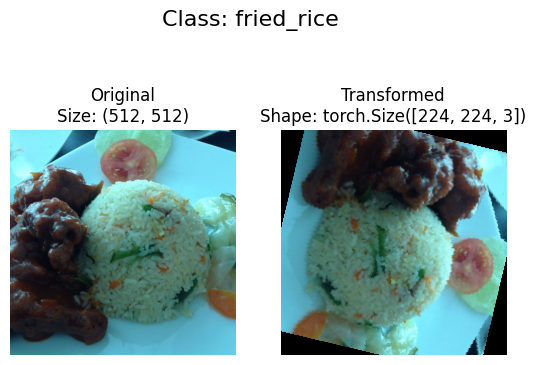

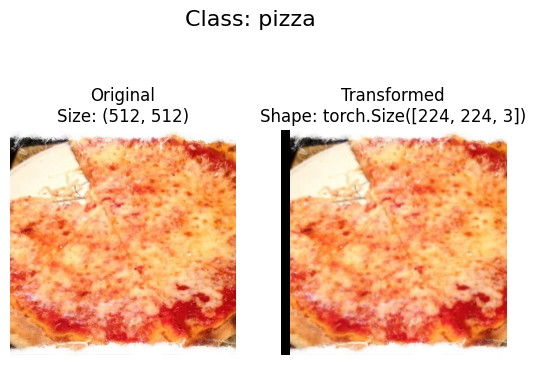

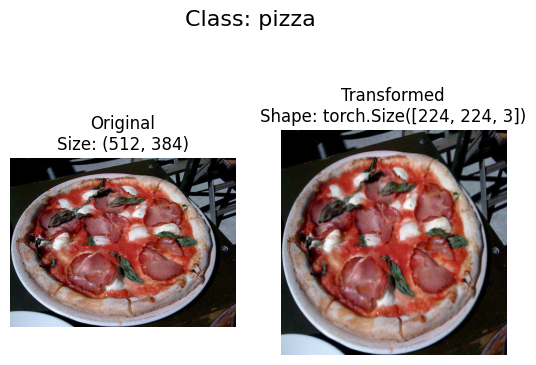

In [ ]:
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transform,
    n=3,
    seed=None
)

# 2.Model 0

In [ ]:
simple_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                       transforms.ToTensor()])

In [ ]:
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

In [ ]:
class TinyVGG(nn.Module):
  def __init__(self, input_shape:int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.classifier = nn.Sequential(nn.Flatten(),
                                    nn.Linear(in_features=hidden_units*2809,
                                              out_features=output_shape))
  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x
    # return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [ ]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=28090, out_features=3, bias=True)
  )
)

In [ ]:
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [ ]:
model_0(image_batch.to(device))

tensor([[ 0.0314,  0.0004, -0.0026],
        [ 0.0351,  0.0028, -0.0051],
        [ 0.0351,  0.0029, -0.0050],
        [ 0.0351,  0.0062, -0.0056],
        [ 0.0340,  0.0050, -0.0052],
        [ 0.0388,  0.0047, -0.0047],
        [ 0.0382,  0.0039, -0.0061],
        [ 0.0378,  0.0069, -0.0052],
        [ 0.0382,  0.0085, -0.0053],
        [ 0.0402,  0.0042, -0.0097],
        [ 0.0342,  0.0025, -0.0052],
        [ 0.0369,  0.0023, -0.0075],
        [ 0.0367,  0.0044, -0.0047],
        [ 0.0381,  0.0037, -0.0044],
        [ 0.0391,  0.0052, -0.0074],
        [ 0.0362,  0.0012, -0.0051],
        [ 0.0407,  0.0063, -0.0068],
        [ 0.0393,  0.0058, -0.0049],
        [ 0.0360,  0.0049, -0.0058],
        [ 0.0364,  0.0022, -0.0023],
        [ 0.0372,  0.0022, -0.0033],
        [ 0.0342,  0.0057, -0.0061],
        [ 0.0328,  0.0073, -0.0071],
        [ 0.0374,  0.0040, -0.0055],
        [ 0.0418,  0.0016, -0.0082],
        [ 0.0339,  0.0015, -0.0035],
        [ 0.0434,  0.0042, -0.0024],
 

In [ ]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo
from torchinfo import summary
summary(model_0, input_size=[1, 3, 224, 224])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 110, 110]         --
│    └─Conv2d: 2-1                       [1, 10, 222, 222]         280
│    └─ReLU: 2-2                         [1, 10, 222, 222]         --
│    └─Conv2d: 2-3                       [1, 10, 220, 220]         910
│    └─ReLU: 2-4                         [1, 10, 220, 220]         --
│    └─MaxPool2d: 2-5                    [1, 10, 110, 110]         --
├─Sequential: 1-2                        [1, 10, 53, 53]           --
│    └─Conv2d: 2-6                       [1, 10, 108, 108]         910
│    └─ReLU: 2-7                         [1, 10, 108, 108]         --
│    └─Conv2d: 2-8                       [1, 10, 106, 106]         910
│    └─ReLU: 2-9                         [1, 10, 106, 106]         --
│    └─MaxPool2d: 2-10                   [1, 10, 53, 53]           --
├─Sequentia

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):
  model.train()
  train_loss, train_acc = 0, 0
  for batch, (X,y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss+=loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc+=(y_pred_class==y).sum().item()/len(y_pred)
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  model.eval()
  test_loss, test_acc = 0, 0
  with torch.inference_mode():
    for batch, (X,y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)
      test_pred_logits = model(X)
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
  test_loss = test_loss/len(dataloader)
  test_acc = test_acc/len(dataloader)
  return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module=nn.CrossEntropyLoss(),
          epochs: int=5,
          device=device
          ):
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
  return results

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 50
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr = 0.001)
from timeit import default_timer as timer
start_time = timer()
model_0_results = train(model=model_0,
                       train_dataloader=train_dataloader_simple,
                       test_dataloader=test_dataloader_simple,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=NUM_EPOCHS)
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.2244 | Train Acc: 0.4141 | Test Loss: 1.1060 | Test Acc: 0.2604
Epoch: 1 | Train loss: 1.1120 | Train Acc: 0.2656 | Test Loss: 1.0592 | Test Acc: 0.5417
Epoch: 2 | Train loss: 1.1435 | Train Acc: 0.2812 | Test Loss: 1.0718 | Test Acc: 0.5417
Epoch: 3 | Train loss: 1.0785 | Train Acc: 0.4102 | Test Loss: 1.2209 | Test Acc: 0.1979
Epoch: 4 | Train loss: 1.1321 | Train Acc: 0.3242 | Test Loss: 1.1250 | Test Acc: 0.2917
Epoch: 5 | Train loss: 1.0904 | Train Acc: 0.3750 | Test Loss: 1.0189 | Test Acc: 0.5417
Epoch: 6 | Train loss: 1.0770 | Train Acc: 0.3984 | Test Loss: 1.1301 | Test Acc: 0.3438
Epoch: 7 | Train loss: 1.0800 | Train Acc: 0.4375 | Test Loss: 1.2499 | Test Acc: 0.1979
Epoch: 8 | Train loss: 1.0924 | Train Acc: 0.4180 | Test Loss: 1.1396 | Test Acc: 0.2292
Epoch: 9 | Train loss: 1.0637 | Train Acc: 0.4336 | Test Loss: 1.0315 | Test Acc: 0.3438
Epoch: 10 | Train loss: 0.9786 | Train Acc: 0.5938 | Test Loss: 1.1367 | Test Acc: 0.3125
Epoch: 11 | Train lo

In [ ]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):
  loss = results["train_loss"]
  test_loss = results["test_loss"]
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]
  epochs = range(len(results["train_loss"]))
  plt.figure(figsize=(15,7))
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

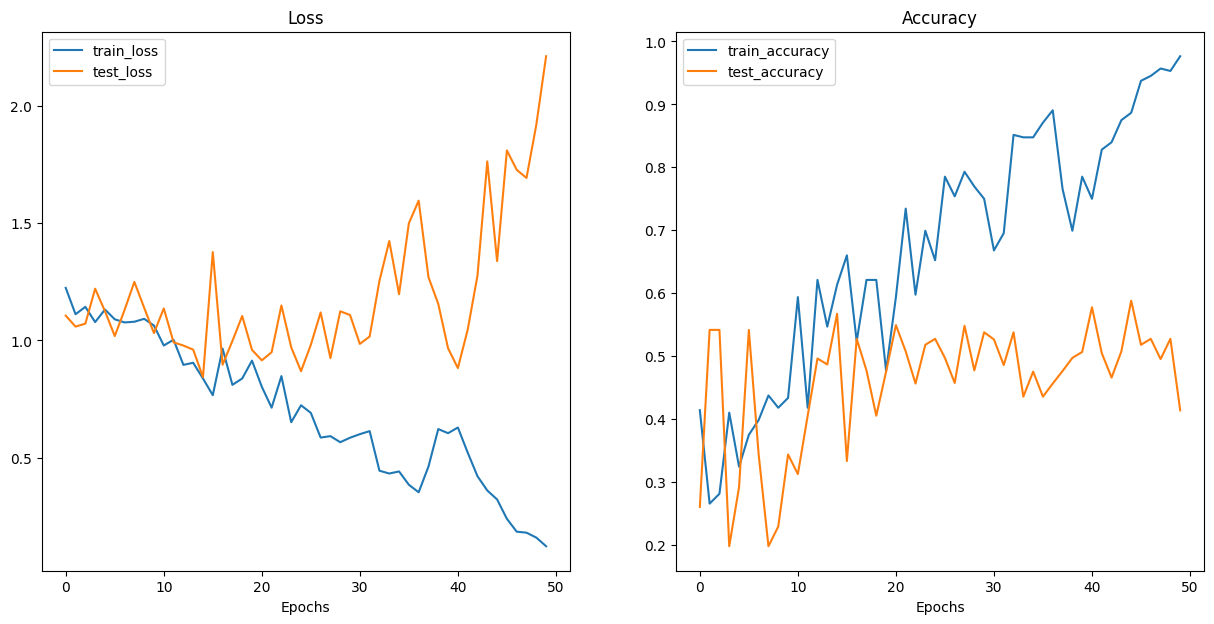

In [ ]:
plot_loss_curves(model_0_results)

# 3.TinyVGG with data augmentation

In [ ]:
from torchvision import transforms
train_transform_trivial = transforms.Compose([transforms.Resize(size=(224, 224)),
                                              transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                              transforms.ToTensor()])
test_transform_simple = transforms.Compose([transforms.Resize(size=(224, 224)),
                                            transforms.ToTensor()])

In [ ]:
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root=train_dir,
                                             transform=train_transform_trivial)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=test_transform_simple)

In [ ]:
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

In [ ]:
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=28090, out_features=3, bias=True)
  )
)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
NUM_EPOCHS = 50
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)
from timeit import default_timer as timer
start_time = timer()

model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device)
end_time = timer()
print(f"Total training time for model_1: {end_time-start_time:.3f} seconds")

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.2069 | Train Acc: 0.3828 | Test Loss: 1.5504 | Test Acc: 0.2604
Epoch: 1 | Train loss: 1.2437 | Train Acc: 0.2812 | Test Loss: 1.0476 | Test Acc: 0.5417
Epoch: 2 | Train loss: 1.0990 | Train Acc: 0.4023 | Test Loss: 1.1418 | Test Acc: 0.2604
Epoch: 3 | Train loss: 1.1152 | Train Acc: 0.3047 | Test Loss: 1.1934 | Test Acc: 0.2604
Epoch: 4 | Train loss: 1.1144 | Train Acc: 0.3125 | Test Loss: 1.1749 | Test Acc: 0.1979
Epoch: 5 | Train loss: 1.1028 | Train Acc: 0.2734 | Test Loss: 1.1283 | Test Acc: 0.2604
Epoch: 6 | Train loss: 1.0943 | Train Acc: 0.4258 | Test Loss: 1.1292 | Test Acc: 0.1979
Epoch: 7 | Train loss: 1.1108 | Train Acc: 0.2930 | Test Loss: 1.1444 | Test Acc: 0.1979
Epoch: 8 | Train loss: 1.1169 | Train Acc: 0.2930 | Test Loss: 1.1311 | Test Acc: 0.2812
Epoch: 9 | Train loss: 1.0958 | Train Acc: 0.4375 | Test Loss: 1.0993 | Test Acc: 0.2604
Epoch: 10 | Train loss: 1.0963 | Train Acc: 0.4258 | Test Loss: 1.0968 | Test Acc: 0.2604
Epoch: 11 | Train lo

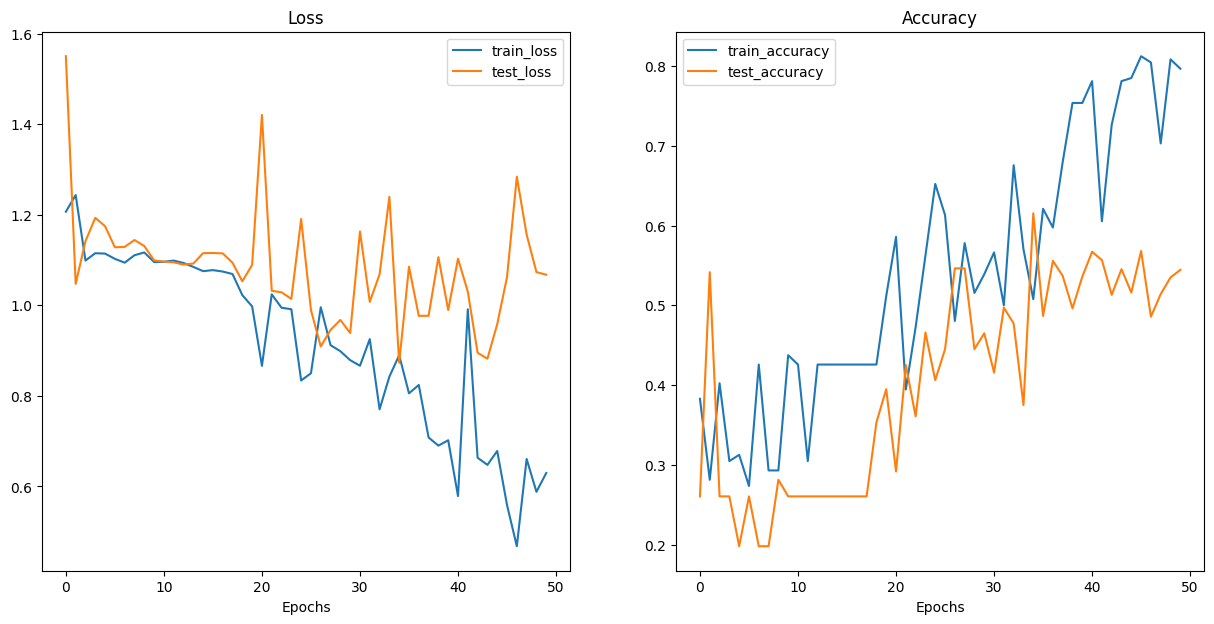

In [ ]:
plot_loss_curves(model_1_results)

# 4.Compare Models

In [ ]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

train_loss  train_acc  test_loss  test_acc
0     1.224357   0.414062   1.106004  0.260417
1     1.111951   0.265625   1.059188  0.541667
2     1.143521   0.281250   1.071821  0.541667
3     1.078477   0.410156   1.220918  0.197917
4     1.132087   0.324219   1.125010  0.291667
5     1.090389   0.375000   1.018946  0.541667
6     1.076957   0.398438   1.130119  0.343750
7     1.080015   0.437500   1.249891  0.197917
8     1.092359   0.417969   1.139576  0.229167
9     1.063678   0.433594   1.031513  0.343750
10    0.978570   0.593750   1.136726  0.312500
11    1.003230   0.417969   0.992164  0.405303
12    0.896059   0.621094   0.978443  0.496212
13    0.904905   0.546875   0.960878  0.486742
14    0.837759   0.613281   0.843751  0.567235
15    0.766731   0.660156   1.376965  0.333333
16    0.965398   0.523438   0.896730  0.527462
17    0.810829   0.621094   0.997873  0.477273
18    0.837896   0.621094   1.104526  0.405303
19    0.914095   0.476562   0.959830  0.475379
20    0.802690   0.593750   0.915388  0.549242
21    0.713498   0.734375   0.949769  0.507576
22    0.848109   0.597656   1.149438  0.456439
23    0.651390   0.699219   0.970907  0.517992
24    0.723788   0.652344   0.869129  0.527462
25    0.691149   0.785156   0.981654  0.497159
26    0.586009   0.753906   1.119633  0.457386
27    0.592145   0.792969   0.924946  0.548295
28    0.566231   0.769531   1.124545  0.477273
29    0.585394   0.750000   1.108707  0.537879
30    0.600533   0.667969   0.985481  0.526515
31    0.613544   0.695312   1.016882  0.485795
32    0.444745   0.851562   1.254647  0.537879
33    0.432667   0.847656   1.424244  0.435606
34    0.441575   0.847656   1.197483  0.475379
35    0.384826   0.871094   1.499787  0.435606
36    0.352713   0.890625   1.596210  0.456439
37    0.462519   0.765625   1.270128  0.476326
38    0.622342   0.699219   1.155964  0.497159
39    0.604717   0.785156   0.966537  0.506629
40    0.628896   0.750000   0.882337  0.577652
41    0.522042   0.828125   1.045764  0.504735
42    0.421199   0.839844   1.276977  0.465909
43    0.360246   0.875000   1.763753  0.507576
44    0.322223   0.886719   1.338586  0.588068
45    0.239569   0.937500   1.810587  0.517992
46    0.184701   0.945312   1.727835  0.527462
47    0.180414   0.957031   1.693158  0.495265
48    0.159437   0.953125   1.919867  0.527462
49    0.122668   0.976562   2.212274  0.413826

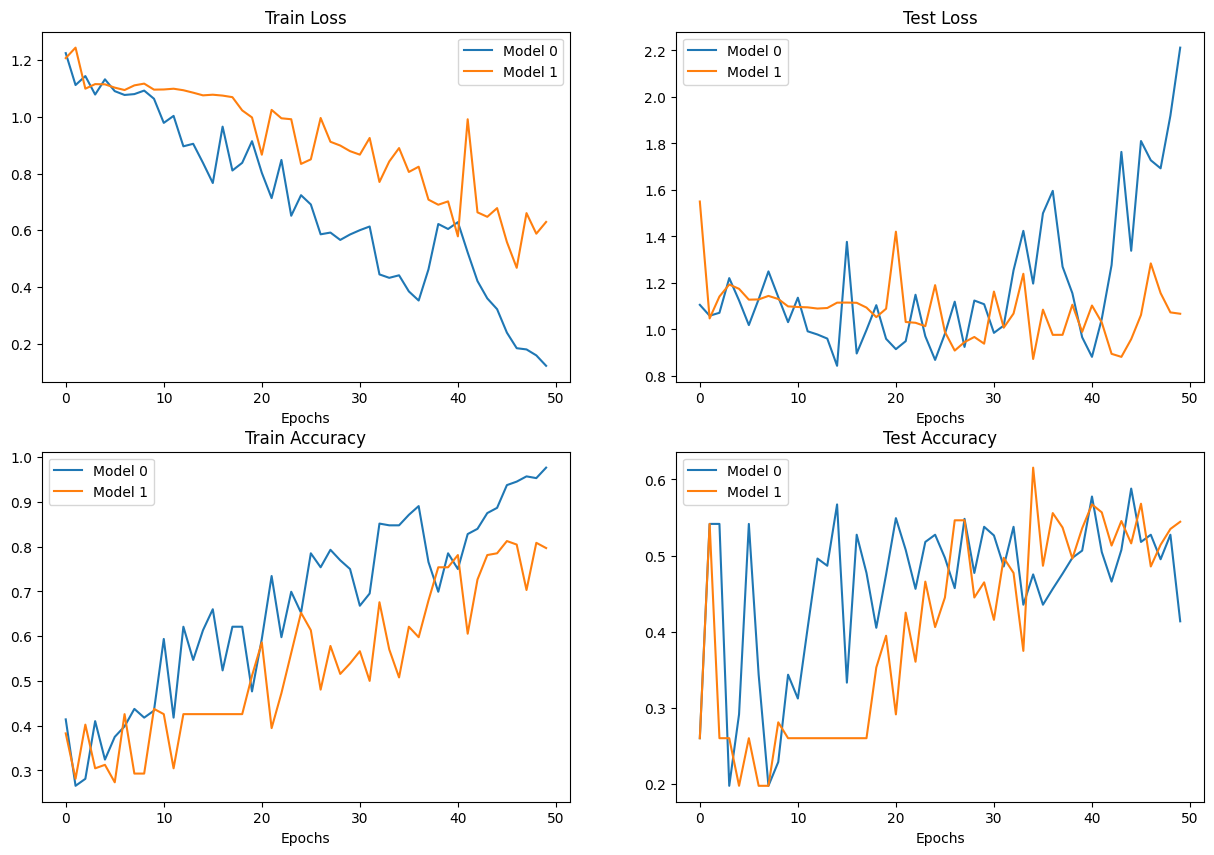

In [ ]:
plt.figure(figsize=(15, 10))
epochs = range(len(model_0_df))
plt.subplot(2,2,1)
plt.plot(epochs,model_0_df["train_loss"], label="Model 0")
plt.plot(epochs,model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()
plt.subplot(2,2,2)
plt.plot(epochs,model_0_df["test_loss"], label="Model 0")
plt.plot(epochs,model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()
plt.subplot(2,2,3)
plt.plot(epochs,model_0_df["train_acc"], label="Model 0")
plt.plot(epochs,model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.subplot(2,2,4)
plt.plot(epochs,model_0_df["test_acc"], label="Model 0")
plt.plot(epochs,model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend()

# 5.Predicting custom Image

In [ ]:
import requests
custom_image_path = data_path / "fried_rice.jpg"
if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    request=requests.get("https://raw.githubusercontent.com/Hrut7hesh/git_test/main/fried_rice.jpg")
    print(f"Downloading {custom_image_path}...")
    f.write(request.content)
else:
  print(f"{custom_image_path} already exists, skipping download...")

data/fried_rice.jpg already exists, skipping download...


In [ ]:
import torchvision

custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
print(f"Custom image tensor:\n {custom_image_uint8}")
print(f"Custom image shape: {custom_image_uint8.shape}")
print(f"Custom image datatype: {custom_image_uint8.dtype}")

Custom image tensor:
 tensor([[[210, 211, 211,  ...,   9,   9,   9],
         [208, 209, 210,  ...,   9,   9,   9],
         [206, 206, 207,  ...,   8,   8,   8],
         ...,
         [203, 201, 197,  ..., 172, 171, 171],
         [200, 200, 199,  ..., 172, 171, 171],
         [194, 198, 203,  ..., 172, 171, 171]],

        [[165, 166, 166,  ...,   5,   5,   5],
         [163, 164, 165,  ...,   5,   5,   5],
         [161, 161, 162,  ...,   4,   4,   4],
         ...,
         [169, 167, 161,  ..., 156, 155, 155],
         [166, 166, 163,  ..., 156, 155, 155],
         [160, 164, 167,  ..., 156, 155, 155]],

        [[132, 133, 133,  ...,   2,   2,   2],
         [130, 131, 132,  ...,   2,   2,   2],
         [128, 128, 129,  ...,   1,   1,   1],
         ...,
         [132, 130, 125,  ..., 143, 142, 142],
         [129, 129, 127,  ..., 143, 142, 142],
         [123, 127, 131,  ..., 143, 142, 142]]], dtype=torch.uint8)
Custom image shape: torch.Size([3, 1125, 1500])
Custom image data

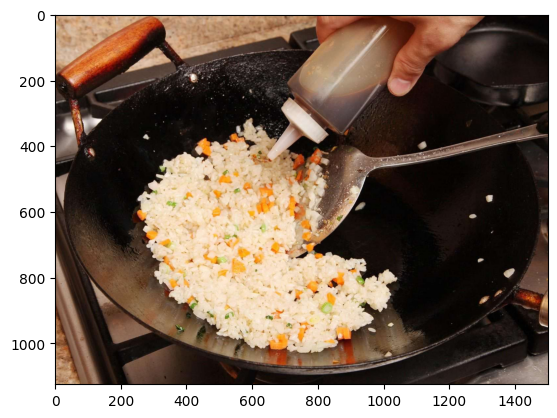

In [ ]:
plt.imshow(custom_image_uint8.permute(1,2,0))

In [ ]:
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32) / 255.
custom_image

tensor([[[0.8235, 0.8275, 0.8275,  ..., 0.0353, 0.0353, 0.0353],
         [0.8157, 0.8196, 0.8235,  ..., 0.0353, 0.0353, 0.0353],
         [0.8078, 0.8078, 0.8118,  ..., 0.0314, 0.0314, 0.0314],
         ...,
         [0.7961, 0.7882, 0.7725,  ..., 0.6745, 0.6706, 0.6706],
         [0.7843, 0.7843, 0.7804,  ..., 0.6745, 0.6706, 0.6706],
         [0.7608, 0.7765, 0.7961,  ..., 0.6745, 0.6706, 0.6706]],

        [[0.6471, 0.6510, 0.6510,  ..., 0.0196, 0.0196, 0.0196],
         [0.6392, 0.6431, 0.6471,  ..., 0.0196, 0.0196, 0.0196],
         [0.6314, 0.6314, 0.6353,  ..., 0.0157, 0.0157, 0.0157],
         ...,
         [0.6627, 0.6549, 0.6314,  ..., 0.6118, 0.6078, 0.6078],
         [0.6510, 0.6510, 0.6392,  ..., 0.6118, 0.6078, 0.6078],
         [0.6275, 0.6431, 0.6549,  ..., 0.6118, 0.6078, 0.6078]],

        [[0.5176, 0.5216, 0.5216,  ..., 0.0078, 0.0078, 0.0078],
         [0.5098, 0.5137, 0.5176,  ..., 0.0078, 0.0078, 0.0078],
         [0.5020, 0.5020, 0.5059,  ..., 0.0039, 0.0039, 0.

In [ ]:
from torchvision import transforms
custom_image_transform = transforms.Compose([transforms.Resize(size=(224, 224))])
custom_image_transformed = custom_image_transform(custom_image)
print(f"Original shape: {custom_image.shape}")
print(f"Tranformed shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 1125, 1500])
Tranformed shape: torch.Size([3, 224, 224])


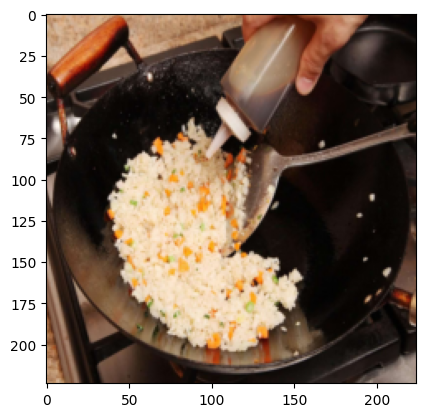

In [ ]:
plt.imshow(custom_image_transformed.permute(1,2,0))

In [ ]:
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.unsqueeze(0).to(device))
custom_image_pred

tensor([[-2.0744,  0.1641, -0.8321]], device='cuda:0')

In [ ]:
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
custom_image_pred_probs

tensor([[0.0722, 0.6776, 0.2502]], device='cuda:0')

In [ ]:
custom_image_pred_labels = torch.argmax(custom_image_pred_probs, dim=1).cpu()
custom_image_pred_labels

tensor([1])

In [ ]:
class_names[custom_image_pred_labels]

'fried_rice'

In [ ]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None,
                        device=device):
  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
  target_image = target_image / 255.
  if transform:
    target_image=transform(target_image)
  model.to(device)
  model.eval()
  with torch.inference_mode():
    target_image = target_image.unsqueeze(0)
    target_image_pred = model(target_image.to(device))
  target_image_pred_probs = torch.softmax(target_image_pred, dim=1)
  target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)
  plt.imshow(target_image.squeeze().permute(1,2,0))
  if class_names:
    title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
  else:
    title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
  plt.title(title)
  plt.axis(False)

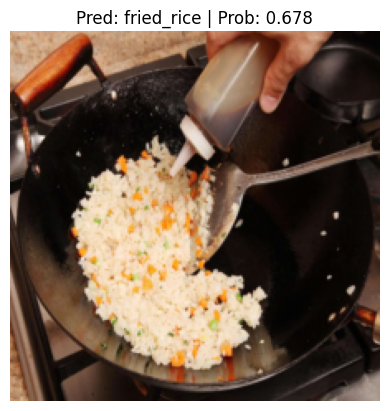

In [ ]:
pred_and_plot_image(model=model_1,
                     image_path=custom_image_path,
                     class_names=class_names,
                     transform=custom_image_transform,
                     device=device)